In [134]:
from bs4 import BeautifulSoup
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
url = 'https://www.rijksoverheid.nl/documenten/publicaties/2019/01/14/de-asielinstroom-per-week-2019'
html_doc = urllib.request.urlopen(url)
soup = BeautifulSoup(html_doc, 'html.parser')


In [136]:
mydivs = soup.findAll("a", {"class": "news"})
numbers = []
weeks = []
for i in mydivs:
    weeks.append(int(i.findAll('h3')[0].text.strip().split(' ')[4]))
    numbers.append(float(i.findAll('h3')[0].text.strip().split(' ')[-1]))

In [137]:
df = pd.DataFrame(np.array([weeks, numbers]).T, columns=['week','aantal']).sort_values('week')
df['week']=df['week'].apply(lambda x: int(x))
df['week2']=df['week']-1
df['cumulatief']= df['aantal'].cumsum()

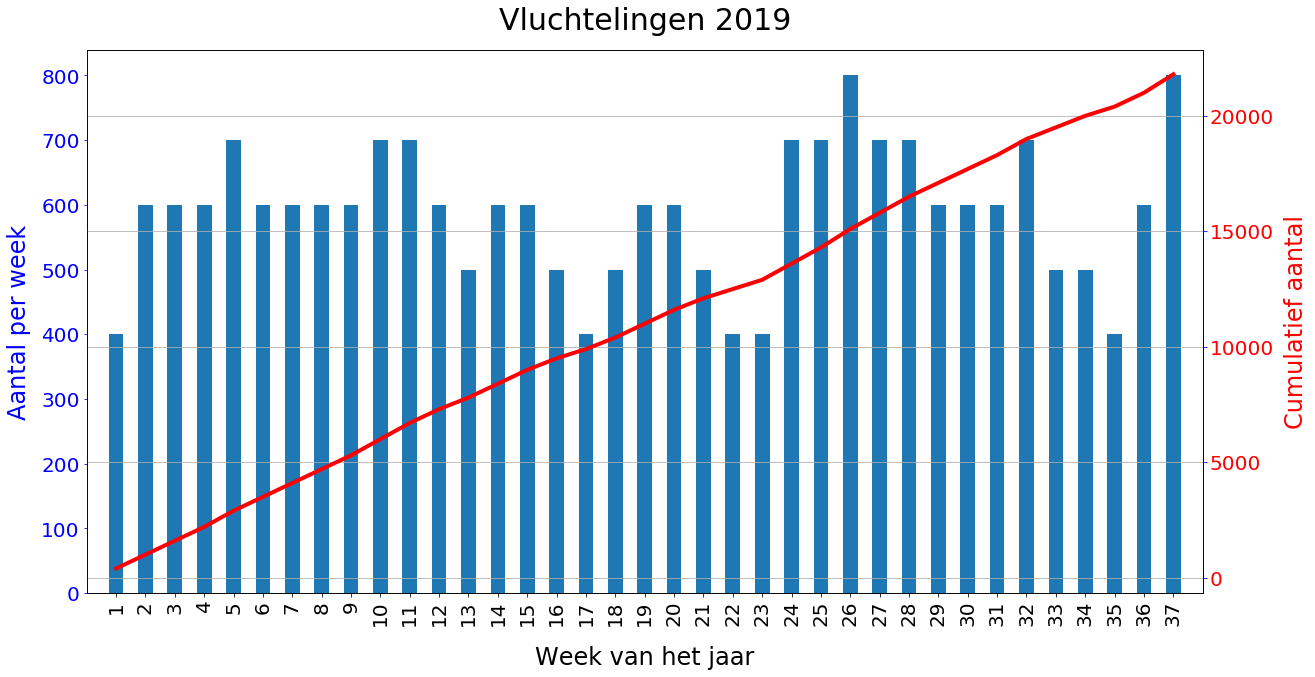

In [140]:

fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
df.plot(x='week',y='aantal',ax=ax, kind='bar', legend=None)
df.plot(x='week2',y='cumulatief',ax=ax2, color='r', linewidth=4, legend=None)
ax2.grid()
ax.set_xlabel("Week van het jaar", fontsize=24, labelpad=20)
ax.set_ylabel("Aantal per week", fontsize=24, color='b', labelpad=10)
ax2.set_ylabel("Cumulatief aantal", fontsize=24, color='r', labelpad=10)
ax.tick_params(labelsize=20, color='b',axis='y', labelcolor='b')
ax2.tick_params(labelsize=20, color='b',axis='y', labelcolor='r')
ax.tick_params(labelsize=20, color='k',axis='x', labelcolor='k')
ax.set_xlim([-1,37])
ax.set_title("Vluchtelingen 2019", fontsize=30, pad=20)
fig.savefig("vluchtelingen.png")